Part 1: Generate Data

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import linear_model as lm

np.random.seed(6518)

csize= 10
p = 2      
s = 0.75
m1 = [1,0]
m2 = [0,1]
c1 = np.random.normal(size = (csize, p)) * s \
     + np.array([m1] * csize)
c2 = np.random.normal(size = (csize, p)) * s \
     + np.array([m2] * csize)
centers = np.concatenate([c1,c2])

In [162]:
n = 100  
s = 1/5

cluster_size = n//csize
traindata = np.random.normal(size = (2 * n, p)) * s \
            + np.concatenate([np.array([centers[i]] * cluster_size) for i in range(2 * csize)])
Ytrain = np.concatenate(([1]*n, [0]*n))
traindata.shape

(200, 2)

In [163]:
N = 5000  
s = 1/5
test_size = N//csize

testdata = np.random.normal(size = (2 * N, p)) * s \
            + np.concatenate([np.array([centers[i]] * test_size) for i in range(2 * csize)])
Ytest = np.concatenate(([1]*N, [0]*N))
testdata.shape

(10000, 2)

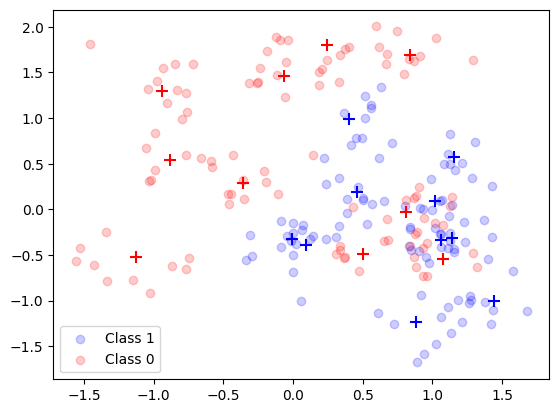

In [164]:
plt.scatter(traindata[:n, 0], traindata[:n, 1], c = "blue", alpha=0.2, label='Class 1')
plt.scatter(traindata[n:, 0], traindata[n:, 1], c = "red", alpha=0.2, label='Class 0')

plt.scatter(centers[:csize,0], centers[:csize,1], marker = '+', s = 80, c = "blue")
plt.scatter(centers[csize:,0], centers[csize:,1], marker = '+', s = 80, c = "red")

plt.legend()
plt.show()

Part 2: kNN

In [165]:
def kNN(traindata,Ytrain,testdata,k=1):
    #return the prediction Yfit
    X = traindata
    n,p = X.shape
    Y = Ytrain.reshape(n,1)
    m = testdata.shape[0]
    X = traindata.reshape(n,1,p)
    Z = testdata.reshape(1,m,p)
    dist = np.linalg.norm(X-Z,axis =2)
    idx = (np.argsort(dist,axis = 0))[:k,:] # when distance ties, follows the smalles argsort index
    lbs = np.take_along_axis(np.tile(Y,(1,m)),idx,axis = 0) 
    pred = (np.average(lbs,axis=0) >= 0.5)*1 # when voting ties, choose 1
    return pred

In [184]:
from sklearn.metrics import confusion_matrix
result = []
for K in [1,3,5]:
    mypred = kNN(traindata,Ytrain,testdata,K)
    mat1 = confusion_matrix(Ytest,mypred)
    neigh = knn(n_neighbors=K)
    neigh.fit(traindata, Ytrain)
    pred =neigh.predict(testdata)
    mat2 = confusion_matrix(Ytest,pred)
    result.append([mat1,mat2])
result

[[array([[4235,  765],
         [ 886, 4114]], dtype=int64),
  array([[4235,  765],
         [ 886, 4114]], dtype=int64)],
 [array([[4166,  834],
         [ 760, 4240]], dtype=int64),
  array([[4166,  834],
         [ 760, 4240]], dtype=int64)],
 [array([[4135,  865],
         [ 666, 4334]], dtype=int64),
  array([[4135,  865],
         [ 666, 4334]], dtype=int64)]]